# 第8章 绘图和可视化

## matplotlib API入门

- 使用matplotlib的办法有很多种，最常用的方式是Pylab模式的IPython（ipython --pylab），这样会将IPython配置为使用你所指定的matplotlib GUI后端，对大部分用户而言，默认的后端就已经够用了；Pylab模式还会向IPython引入一大堆模块和函数以提供一种更接近于MATLAB的界面

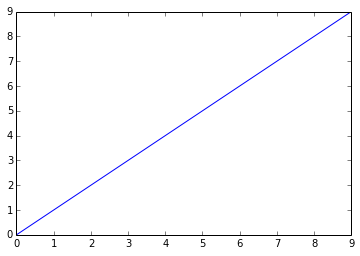

In [1]:
# 若在Pylab模式下，则不需要显式import以下两个包
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.plot(np.arange(10))

- 虽然pandas的绘图函数能够处理许多普通的绘图任务，但如果需要自定义一些高级功能的话就必须学习matplotlib API

### Figure和Subplot

- matplotlib的图像都位于Figure对象中，可以用plt.figure创建一个新的Figure

In [2]:
fig = plt.figure()

- 创建多个subplot

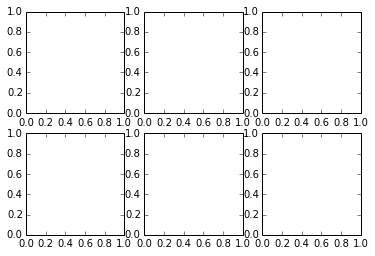

In [3]:
fig, axes = plt.subplots(2, 3)

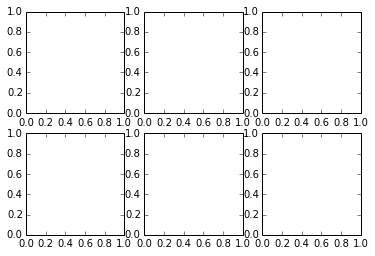

In [4]:
fig

In [5]:
axes

array([[<matplotlib.axes.AxesSubplot object at 0x107bda110>,
      dtype=object)

In [6]:
# 选中其中一个作图
axes[0, 1].plot(np.random.randn(50).cumsum(), 'k--')

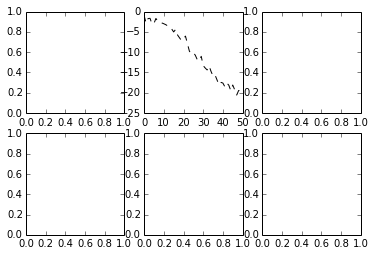

In [7]:
fig

- 调整subplot的间距

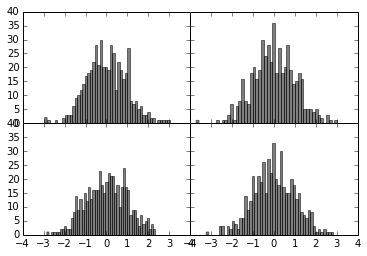

In [8]:
from numpy.random import randn
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

### 颜色、标记和线型

- `ax.plot(x, y, 'g--')`和`ax.plot(x, y, linestyle='--', color='g')`都能指定颜色和线型；常用的颜色都有一个缩写词，要使用其他任意颜色则可以通过指定其RGB值的形式使用（例如：#CECECE）

- 线型图还可以加上一些标记（marker），以强调实际的数据点，但标记类型和线型必须放在颜色后面

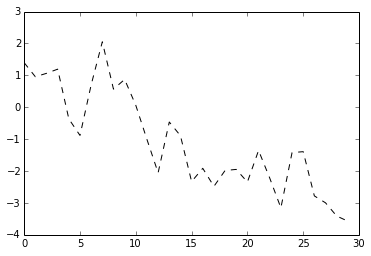

In [9]:
data = randn(30).cumsum()
plt.plot(data, 'k--')

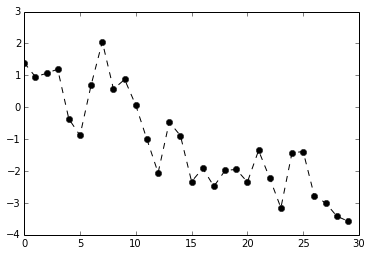

In [10]:
plt.plot(data, 'ko--')

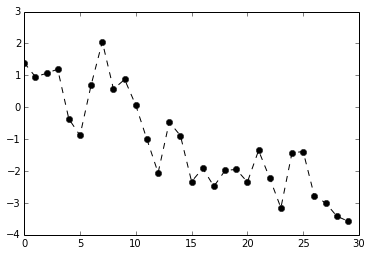

In [11]:
plt.plot(data, color='k', linestyle='dashed', marker='o')

- 在线性图中，非实际数据点默认是按线性方式插值的，可以通过drawstyle选项修改

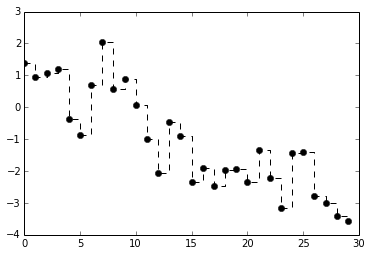

In [12]:
plt.plot(data, 'ko--', drawstyle='steps-post')

### 刻度、标签和图例

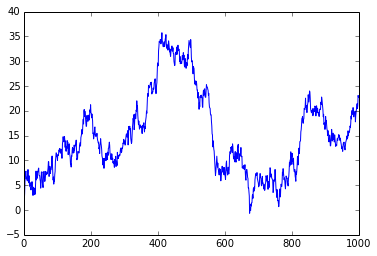

In [13]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum())

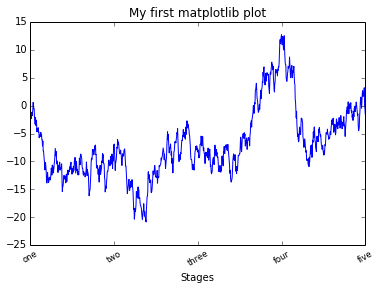

In [14]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ticks = ax.set_xticks([0, 250, 500, 750, 1000]) # 刻度位置
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'], rotation=30, fontsize='small') # 刻度标签
ax.set_title('My first matplotlib plot') # title
ax.set_xlabel('Stages') # x轴标签
ax.plot(randn(1000).cumsum())

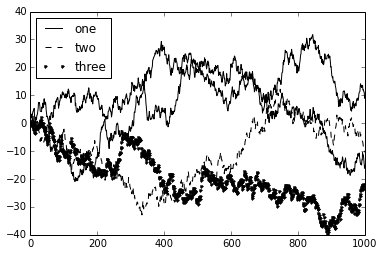

In [15]:
# 添加图例
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')
ax.plot(randn(1000).cumsum(), 'k-')
ax.legend(loc='best')

### 注解以及在subplot上绘图

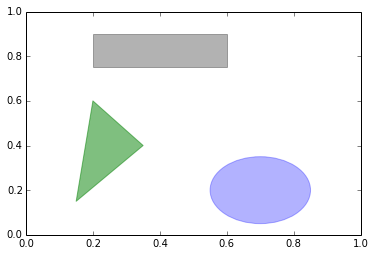

In [16]:
# 绘图
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]], color='g', alpha=0.5)
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

## pandas中的绘图函数

### 线型图

- Series和DataFrame都有一个用于生成各类图表的plot方法，默认情况下，它们所生成的是线型图

In [17]:
from pandas import Series, DataFrame
s = Series(randn(10).cumsum(), index=np.arange(0, 100, 10))
s

0     1.286003
10    2.460506
20    3.087967
30    1.112839
40    2.167497
50    2.238693
60    1.901444
70    0.826231
80    0.627079
90   -0.577583
dtype: float64

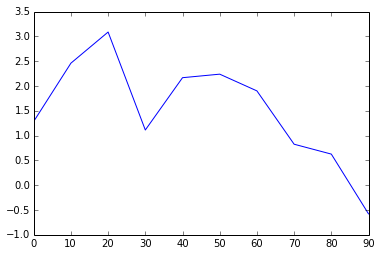

In [18]:
# Series的index会用以绘制X轴
s.plot()

In [19]:
# DataFrame的plot方法会在一个subplot中为各列绘制一条线，并自动创建图例
df = DataFrame(randn(10, 4).cumsum(0), columns=['A', 'B', 'C', 'D'], index=np.arange(0, 100, 10))
df

,A,B,C,D
0,-1.559533,-0.388820,1.946363,-0.035709
10,-0.207228,0.040865,3.233475,-1.344668
20,-0.686820,1.064635,3.626349,-1.436834
30,-0.443782,-0.667111,3.313073,0.179390
40,-0.375103,1.196201,2.350262,0.837144
50,0.455355,0.640170,3.409822,0.342764
60,-0.485072,2.503498,3.255718,0.681874
70,-0.522772,3.267491,3.795509,-0.138342
80,-1.085902,3.000376,2.782270,1.683097
90,-0.906748,3.011002,2.717535,1.667308


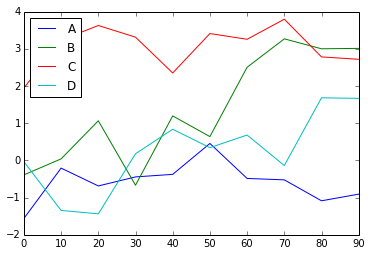

In [20]:
df.plot()

### 柱状图

- 设置kind='bar'（垂直柱状图）或kind='barh'（水平柱状图）即可生成柱状图

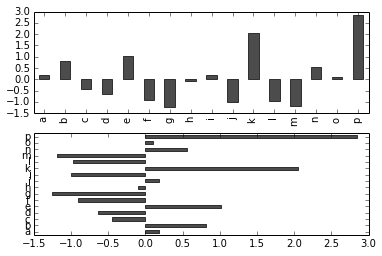

In [21]:
fig, axes = plt.subplots(2, 1)
data = Series(randn(16), index=list('abcdefghijklmnop'))
data.plot(kind='bar', ax=axes[0], color='k', alpha=0.7)
data.plot(kind='barh', ax=axes[1], color='k', alpha=0.7)

- 对于DataFrame，柱状图会将每一行的值分为一组

In [22]:
import pandas as pd
df = DataFrame(randn(6, 4), index=['one', 'two', 'three', 'four', 'five', 'six'], columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df

Genus,A,B,C,D
one,0.117774,0.893426,1.653068,-0.431893
two,0.526093,-0.845329,1.244232,-0.575657
three,1.376694,2.118363,-1.294357,1.681460
four,-0.028795,-1.371877,-0.283863,-1.606134
five,-1.735480,-2.329566,0.881166,0.363452
six,-0.728716,0.863281,1.220038,-0.139408


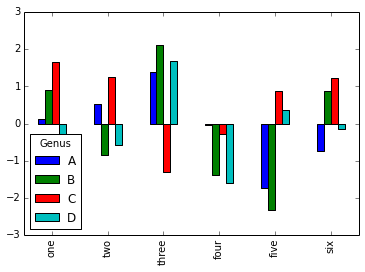

In [23]:
# Genus被用作图例的标题
df.plot(kind='bar')

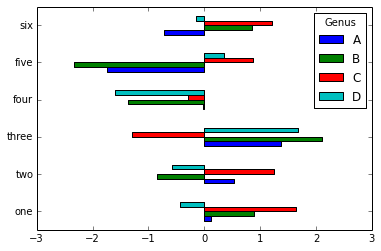

In [24]:
df.plot(kind='barh')

- 设置stacked=True即可为DataFrame生成堆积柱状图

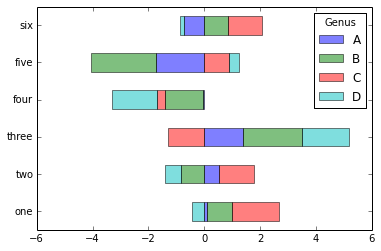

In [25]:
df.plot(kind='barh', stacked=True, alpha=.5)

### 散布图

- 散布图（scatter plot）是观察两个一位数据序列之间的关系的有效手段

In [26]:
macro = pd.read_csv('../../pydata-book/ch08/macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
trans_data

,cpi,m1,tbilrate,unemp
1,0.005849,0.014215,0.088193,-0.128617
2,0.006838,-0.008505,0.215321,0.038466
3,0.000681,-0.003565,0.125317,0.055060
4,0.005772,-0.002861,-0.212805,-0.074108
5,0.000338,0.004289,-0.266946,0.000000
6,0.006745,0.004980,-0.127155,0.074108
7,0.003021,0.001418,-0.030110,0.117783
8,-0.001006,0.007062,0.034338,0.076373
9,0.003683,0.005614,-0.034338,0.028988
10,0.002003,0.008362,0.013015,-0.028988


/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


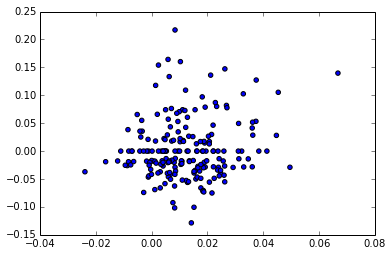

In [27]:
plt.scatter(trans_data['m1'], trans_data['unemp'])

- 在探索式数据分析工作中，同时观察一组变量的散布图是很有意义的，这也被称为散布图矩阵（scatter plot matrix），pandas提供了一个能从DataFrame创建散布图矩阵的scatter_matrix函数，它还支持在对角线上放置各变量的直方图或密度图

/Library/Python/2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes.AxesSubplot object at 0x107f4fb10>,
      dtype=object)

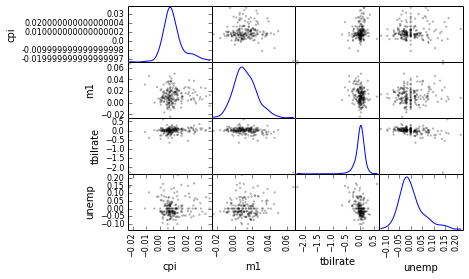

In [28]:
pd.scatter_matrix(trans_data, diagonal='kde', color='k', alpha=0.3)